<a href="https://colab.research.google.com/github/Sums13943/loan-default-prediction-ml/blob/main/loan_default_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,loan_id,age,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term,credit_history,property_area,loan_default
0,L00001,59,Male,Yes,0,Graduate,No,15247,2553,303,360,1.0,Semiurban,0
1,L00002,49,Male,No,0,Graduate,No,6573,1779,563,360,1.0,Urban,0
2,L00003,35,Male,Yes,3,Graduate,Yes,17339,75,406,120,1.0,Semiurban,0
3,L00004,63,Female,Yes,1,Graduate,No,5491,4326,203,360,1.0,Urban,0
4,L00005,28,Female,Yes,2,Graduate,No,2706,5835,329,120,1.0,Semiurban,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             1000 non-null   object 
 1   age                 1000 non-null   int64  
 2   gender              1000 non-null   object 
 3   married             1000 non-null   object 
 4   dependents          1000 non-null   int64  
 5   education           1000 non-null   object 
 6   self_employed       1000 non-null   object 
 7   applicant_income    1000 non-null   int64  
 8   coapplicant_income  1000 non-null   int64  
 9   loan_amount         1000 non-null   int64  
 10  loan_term           1000 non-null   int64  
 11  credit_history      1000 non-null   float64
 12  property_area       1000 non-null   object 
 13  loan_default        1000 non-null   int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 109.5+ KB
loan_default
0    0.851
1    0.149
Name: propo

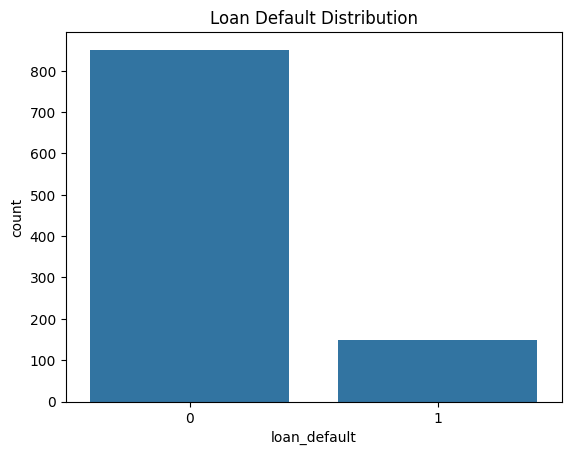

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       170
           1       0.50      0.10      0.17        30

    accuracy                           0.85       200
   macro avg       0.68      0.54      0.54       200
weighted avg       0.81      0.85      0.80       200



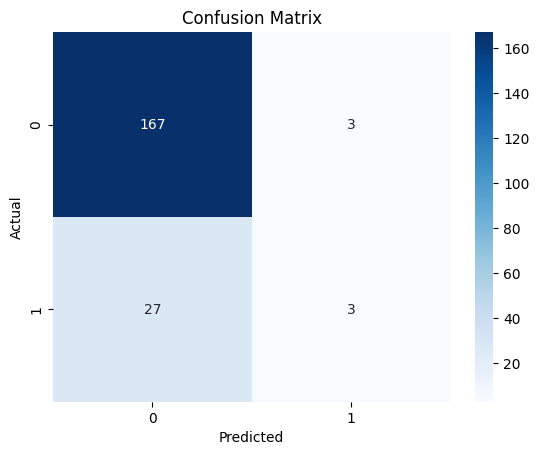

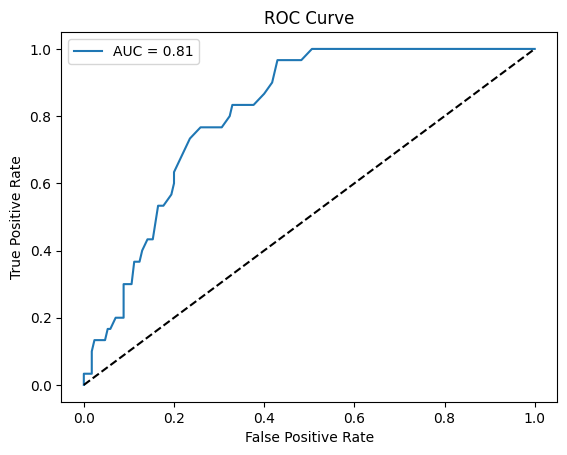

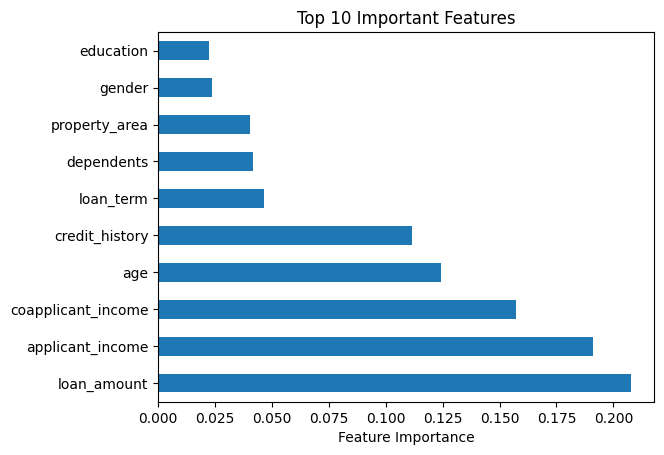

['loan_default_model.pkl']

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

df = pd.read_csv('/content/sample_data/loan_data.csv')
display(df.head())
# Basic info
df.info()

# Class balance
print(df['loan_default'].value_counts(normalize=True))

# Check for missing values
print(df.isnull().sum())

# Visualize target distribution
sns.countplot(x='loan_default', data=df)
plt.title("Loan Default Distribution")
plt.show()

# Copy dataframe
df_clean = df.copy()

# Drop ID column
df_clean.drop(columns=['loan_id'], inplace=True)

# Encode categorical variables
label_encoders = {}
for col in df_clean.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])
    label_encoders[col] = le

df_clean.head()

X = df_clean.drop("loan_default", axis=1)
y = df_clean["loan_default"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_proba):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.xlabel("Feature Importance")
plt.show()

import joblib
joblib.dump(model, 'loan_default_model.pkl')

